In [23]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as pl
from matplotlib.pyplot import subplots


In [94]:
def poisson_fit(x_max=10,samples=100,link='log'):
    xx = np.random.uniform(1,x_max,samples)
    yy = np.array([np.random.poisson(lam=lam,size=1) for lam in xx]).flatten()
    if link == 'log':
        trial_res = sm.GLM(yy,np.vstack([np.ones(len(xx)),xx]).T,family=sm.families.Poisson(link=sm.families.links.log()))
    elif link == 'identity':
        trial_res = sm.GLM(yy,np.vstack([np.ones(len(xx)),xx]).T,family=sm.families.Poisson(link=sm.families.links.identity()))
    trial_res = trial_res.fit()
    return xx,yy,trial_res

In [95]:
x,y,trial_res = poisson_fit(1000,10000)

In [96]:
?trial_res

Type:            GLMResultsWrapper
String form:     <statsmodels.genmod.generalized_linear_model.GLMResultsWrapper object at 0x29cc5ae50>
File:            ~/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py
Docstring:      
Class to contain GLM results.

GLMResults inherits from statsmodels.LikelihoodModelResults

Attributes
----------
df_model : float
    See GLM.df_model
df_resid : float
    See GLM.df_resid
fit_history : dict
    Contains information about the iterations. Its keys are `iterations`,
    `deviance` and `params`.
model : class instance
    Pointer to GLM model instance that called fit.
nobs : float
    The number of observations n.
normalized_cov_params : ndarray
    See GLM docstring
params : ndarray
    The coefficients of the fitted model.  Note that interpretation
    of the coefficients often depends on the distribution family and the
    data.
pvalues : ndarray
    The two-tailed p-values for the parameters.
scale : float
    Th

In [97]:
dir(trial_res)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_data_attr_model',
 '_data_in_cache',
 '_endog',
 '_freq_weights',
 '_get_robustcov_results',
 '_iweights',
 '_n_trials',
 '_use_t',
 '_var_weights',
 'aic',
 'bic',
 'bic_deviance',
 'bic_llf',
 'bse',
 'conf_int',
 'converged',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'deviance',
 'df_model',
 'df_resid',
 'f_test',
 'family',
 'fit_history',
 'fittedvalues',
 'get_hat_matrix_diag',
 'get_influence',
 'get_prediction',
 'info_criteria',
 'initialize',
 'k_constant',
 'llf',
 'llf_scaled',
 'llnull',
 'load',
 'method',
 'mle_settings',
 'model',
 'mu',
 'nobs',
 'normalized_cov_params',
 'nul

In [98]:
trial_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9998
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.4374e+05
Date:                Thu, 17 Oct 2024   Deviance:                   2.0999e+05
Time:                        13:46:13   Pearson chi2:                 1.72e+05
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9624      0.001   4034.429      0.000       4.960       4.965
x1             0.0021   1.72e-06   1239.968      0.000       0.002       0.002
==============================================================================
"""

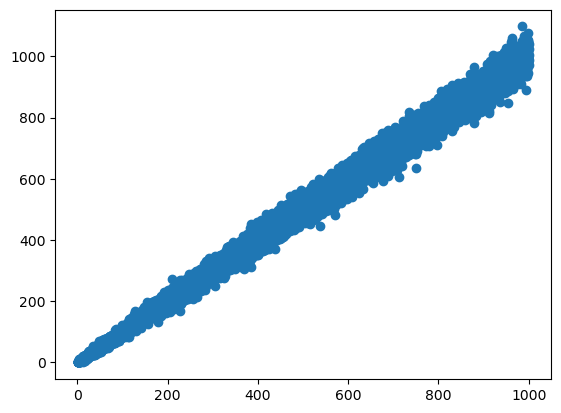

In [123]:
x,y,trial_res = poisson_fit(1000,10000,link='log')
pl.scatter(x,y)

Plotting residual value vs predicted mu

Text(0, 0.5, 'Residual values ($y-\\hat{mu}$)')

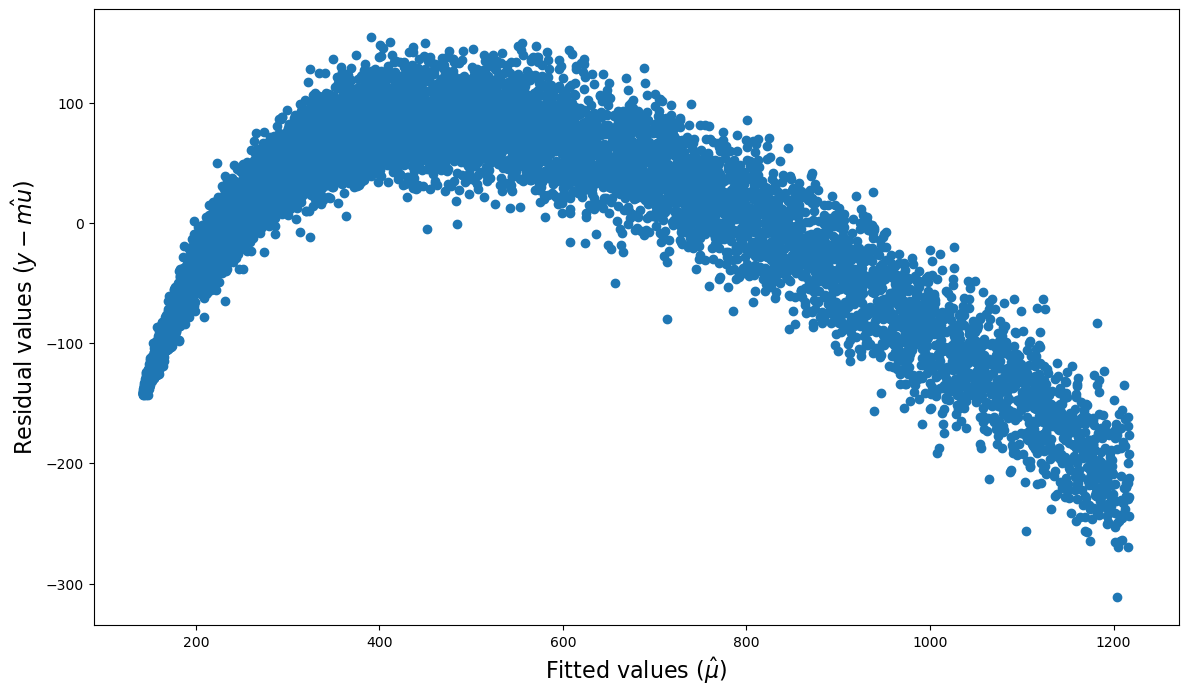

In [130]:
fig,ax=subplots(1,1,figsize=(14,8))
mu = (trial_res.fittedvalues)
true_values = x
resid = (y-mu)
ax.scatter(mu,resid)
ax.set_xlabel(r'Fitted values ($\hat{\mu}$)',fontsize=16)
ax.set_ylabel(r'Residual values ($y-\hat{mu}$)',fontsize=16)

Why is the curve looking like this? 

We are fitting $\mathbb{E}[y] = \mu = x$ with log link function which assumes that $\log \mu = \beta_0 + \beta_1 x$.

Let us try identity link with $\mu = \beta_0 + \beta_1 x$.

/Users/utkarshagrawal/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The identity link function does not respect the domain of the Poisson family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Text(0, 0.5, 'Residual values ($y-\\hat{mu}$)')

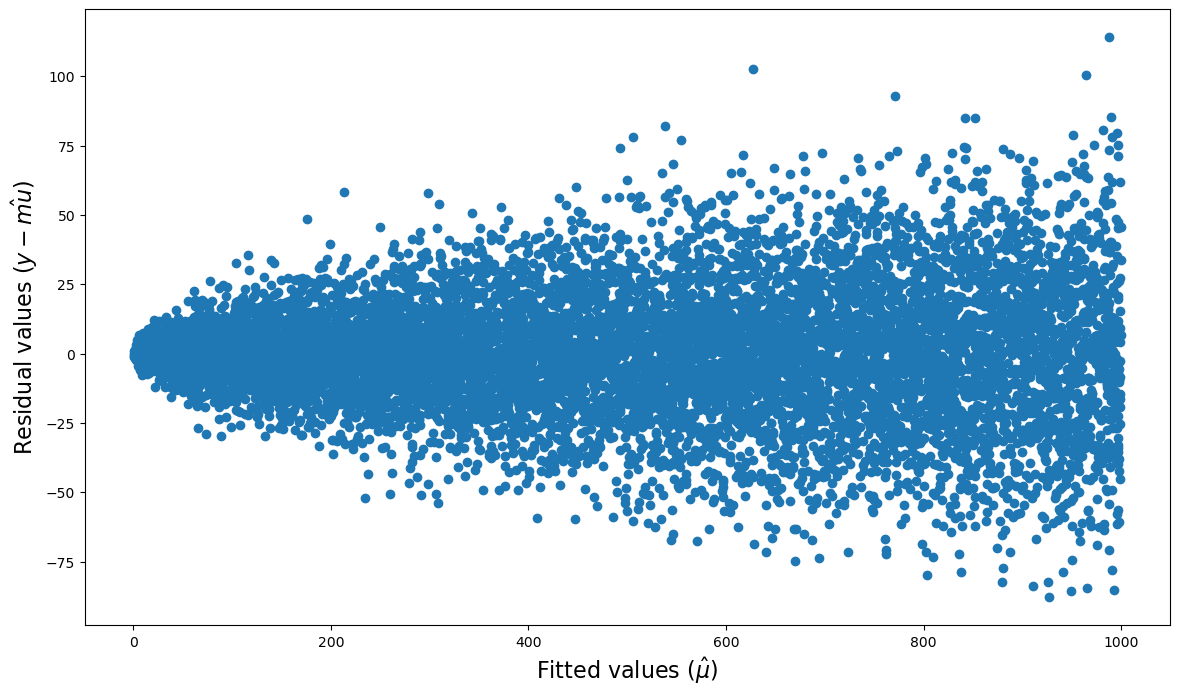

In [132]:
x,y,trial_res = poisson_fit(1000,10000,link='identity')
fig,ax=subplots(1,1,figsize=(14,8))
mu = (trial_res.fittedvalues)
true_values = x
resid = (y-mu)
ax.scatter(mu,resid)
ax.set_xlabel(r'Fitted values ($\hat{\mu}$)',fontsize=16)
ax.set_ylabel(r'Residual values ($y-\hat{mu}$)',fontsize=16)

Better, but why is variance in residual increasing with $\mu$. This is property of Poisson distribution where $\sigma^2 = \mu$. Let us normalize the residual by $\sqrt{\hat{\mu}}$; if the assumption of Poisson is correct then we should see a feature less distribution of residuals.

/Users/utkarshagrawal/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The identity link function does not respect the domain of the Poisson family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Text(0, 0.5, 'Residual values ($y-\\hat{mu}$)')

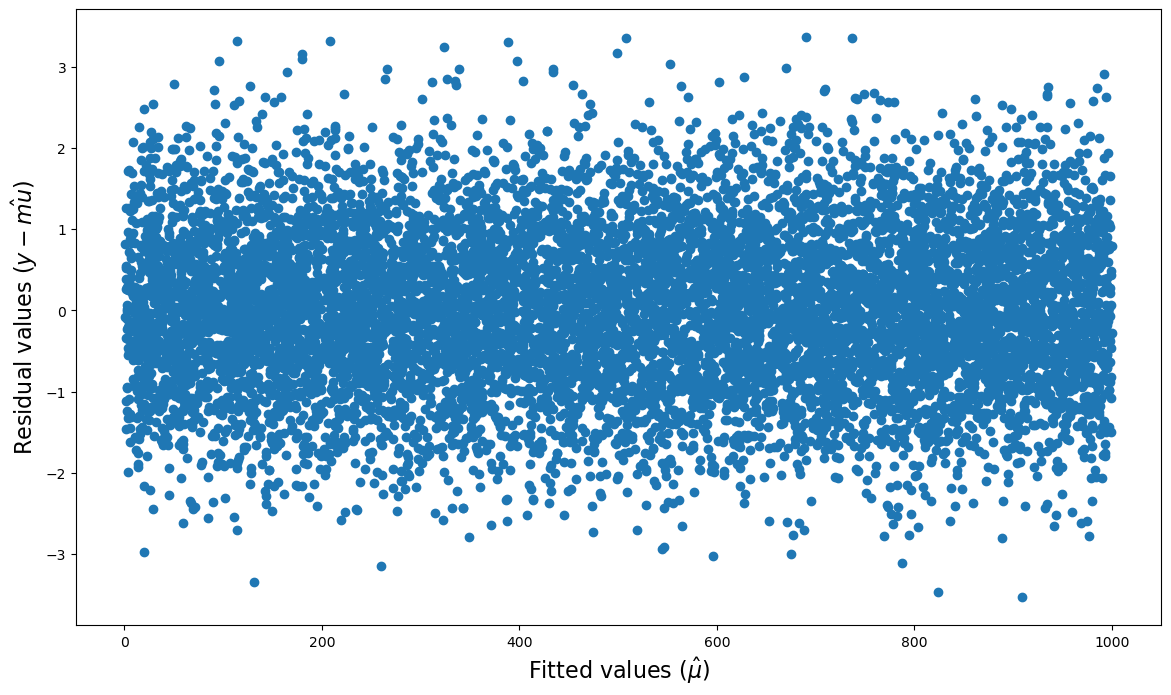

In [133]:
x,y,trial_res = poisson_fit(1000,10000,link='identity')
fig,ax=subplots(1,1,figsize=(14,8))
mu = (trial_res.fittedvalues)
true_values = x
resid = (y-mu)/mu**0.5
ax.scatter(mu,resid)
ax.set_xlabel(r'Fitted values ($\hat{\mu}$)',fontsize=16)
ax.set_ylabel(r'Residual values ($y-\hat{mu}$)',fontsize=16)

Indeed that is what we see.

Side note: Let us see the distribution of $\frac{x-\mu}{\sqrt{\mu}}$ where $x$ is Poisson. Guess is that it should be a normal distribution. In fact as $\mu$ gets bigger, the distribution around the mean is approximately Normal.

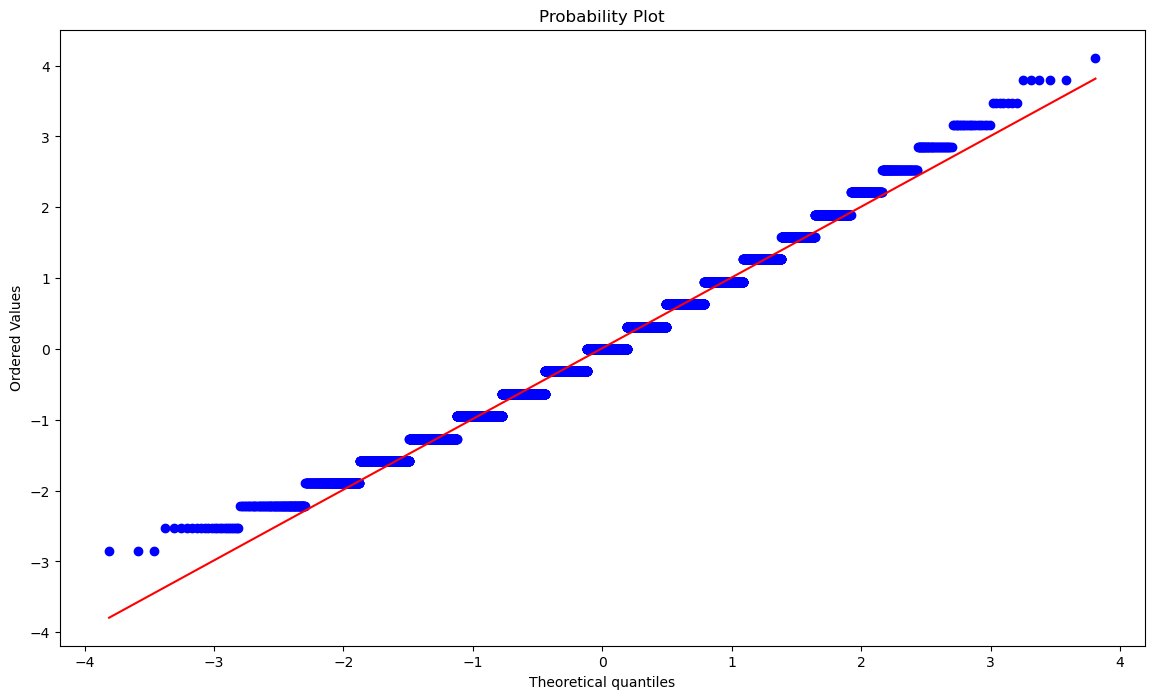

In [163]:
temp = (((np.random.poisson(lam=10,size=10000))) - 10)/10**0.5
from scipy.stats import probplot
fig,ax=subplots(1,1,figsize=(14,8))
_ = probplot(temp,dist='norm',plot=ax)

What if the range of Y is not much? Eg, in the goal prediciton example, Y is the number of goals and it's range is (0,6).

/Users/utkarshagrawal/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The identity link function does not respect the domain of the Poisson family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Text(0, 0.5, 'Residual values ($y-\\hat{mu}$)')

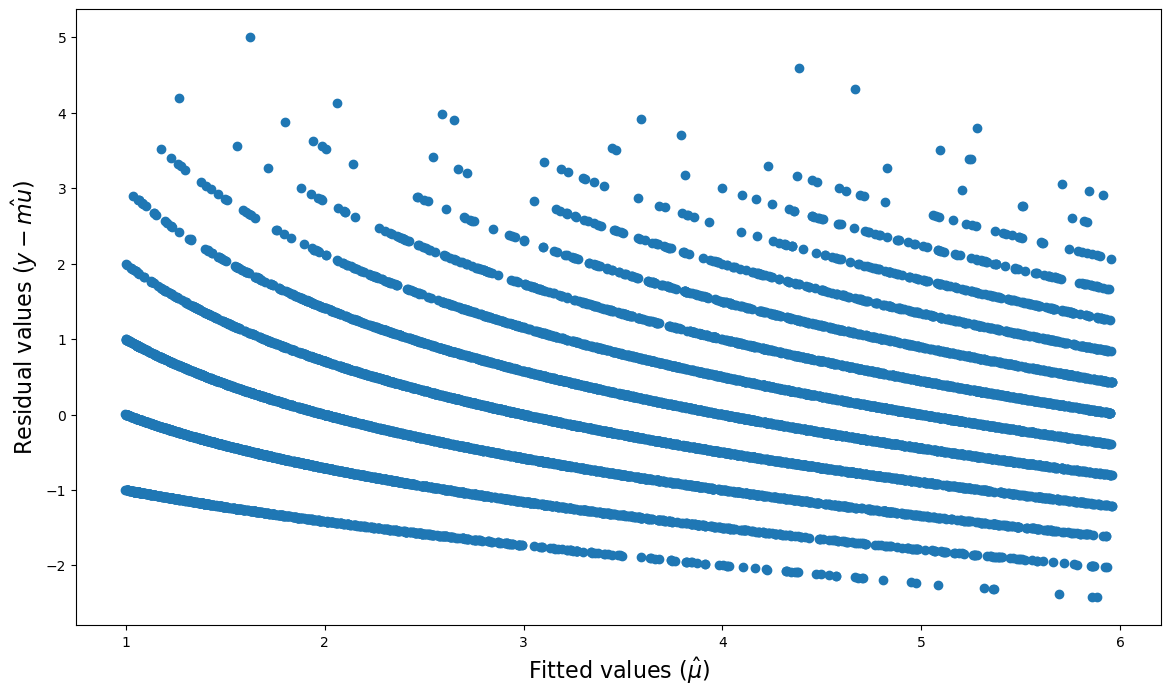

In [164]:
x,y,trial_res = poisson_fit(6,10000,link='identity')
fig,ax=subplots(1,1,figsize=(14,8))
mu = (trial_res.fittedvalues)
true_values = x
resid = (y-mu)/mu**0.5
ax.scatter(mu,resid)
ax.set_xlabel(r'Fitted values ($\hat{\mu}$)',fontsize=16)
ax.set_ylabel(r'Residual values ($y-\hat{mu}$)',fontsize=16)

We see patterns in the plot.

Text(0, 0.5, 'Residual values ($y-\\hat{mu}$)')

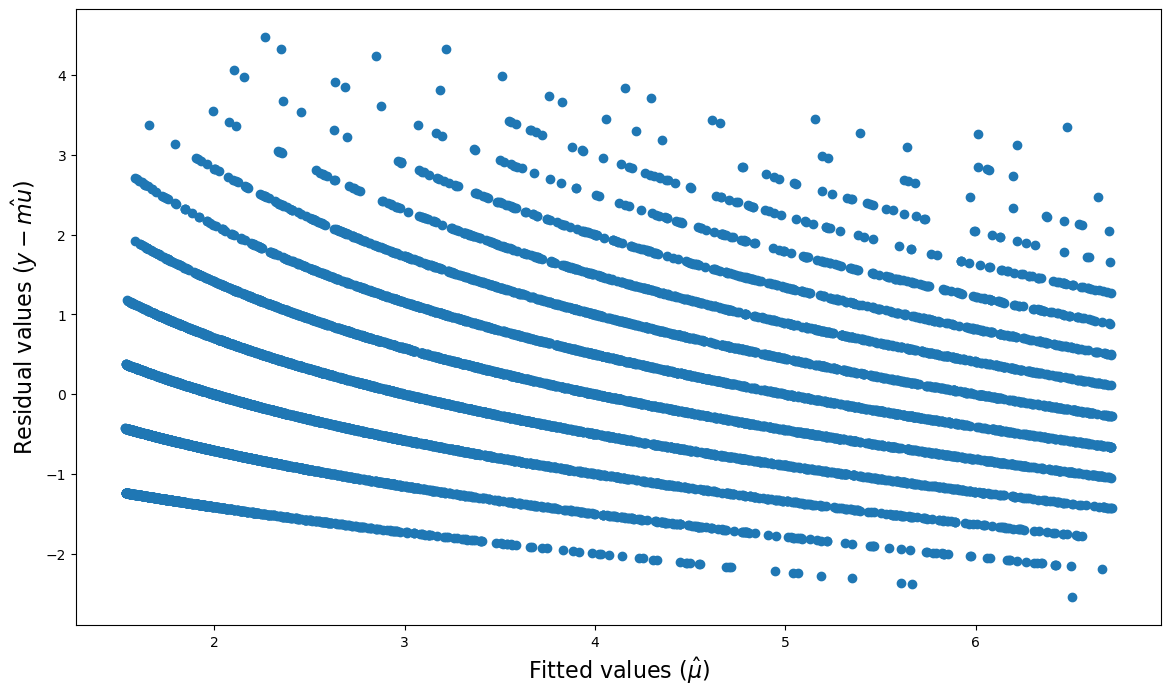

In [165]:
x,y,trial_res = poisson_fit(6,10000,link='log')
fig,ax=subplots(1,1,figsize=(14,8))
mu = (trial_res.fittedvalues)
true_values = x
resid = (y-mu)/mu**0.5
ax.scatter(mu,resid)
ax.set_xlabel(r'Fitted values ($\hat{\mu}$)',fontsize=16)
ax.set_ylabel(r'Residual values ($y-\hat{mu}$)',fontsize=16)

In fact log link also look similar on such small scales.

In [167]:
x_test = np.random.uniform(0,6,100)
x_train = np.random.uniform(0,6,100)
y_train = np.array([np.random.poisson(lam=lam,size=1) for lam in x_train]).flatten()

log_res = sm.GLM(y_train,np.vstack([np.ones(len(x_train)),x_train]).T,family=sm.families.Poisson(link=sm.families.links.log()))
log_res = log_res.fit()

res = sm.GLM(y_train,np.vstack([np.ones(len(x_train)),x_train]).T,family=sm.families.Poisson(link=sm.families.links.identity()))
res = res.fit()


/Users/utkarshagrawal/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The identity link function does not respect the domain of the Poisson family.
  warnings.warn((f"The {type(family.link).__name__} link function "


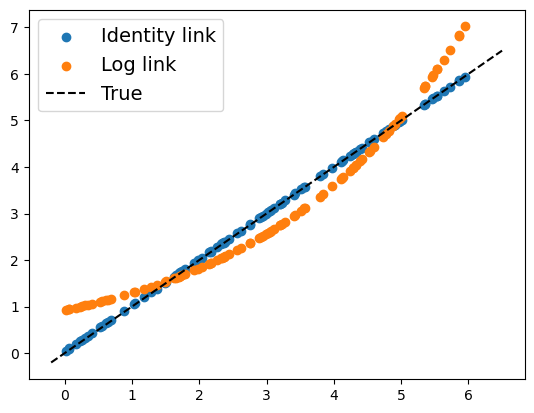

In [187]:
pl.scatter(x_train,res.fittedvalues,label='Identity link')
pl.scatter(x_train,log_res.fittedvalues,label='Log link')
pl.plot([-0.2,6.5],[-0.2,6.5],'--',color='k',label='True')
pl.legend(fontsize=14)

Clearly log link is not good, even though residual plot was similar for both links!

Checking test error

In [188]:
pred = res.predict(np.vstack([np.ones(len(x_test)),x_test]).T)
log_pred = log_res.predict(np.vstack([np.ones(len(x_test)),x_test]).T)

mss = np.sum((pred - x_test)**2)
mss_log = np.sum((log_pred - x_test)**2)
print(mss,mss_log)

0.022741281123825605 21.814549926572315
